**Linear regression:** https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho 

**Logistic regression:** https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/code 

**Neural network:** https://www.kaggle.com/competitions/titanic/overview 

**K-Means:** https://www.kaggle.com/datasets/camnugent/california-housing-prices 

## 1- Linear Regression




**Linear Regression** is a fundamental statistical and machine learning technique used for modeling the relationship between a *dependent* variable (also called the target or outcome) and one or more *independent* variables (also called predictors or features).

It assumes a linear relationship between the variables and aims to find the best-fitting linear equation that can predict the dependent variable based on the values of the independent variables.

#### **1. Environment Setup**

Importing the required libraries and modules, and defining functions for later use.

##### Imports:

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 

linearRegressionData = "./data/carData.csv"

##### Functions

In [153]:
# Creates a scatter plot of the given data
def create_scatter_plot(dataframe, x_column, y_column):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(dataframe[x_column], dataframe[y_column])
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    
    if(x_column == "Kms_Driven"):
        ax.axvline(x=480000, color='r', linestyle='-',)
    else:
        ax.axhline(y=30, color='r', linestyle='-')

    plt.show()

# Splits the data into training and testing sets
def train_test_split(x : np.ndarray, y : np.ndarray, test_size = 0.2):

    m = x.shape[0]

    index = np.arange(m)
    np.random.shuffle(index)

    size = int(m * test_size)

    x_train = x[index[size:]]
    y_train = y[index[size:]]
    x_test = x[index[:size]]
    y_test = y[index[:size]]

    return (x_train, x_test, y_train, y_test)

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("R-Square score :",R_2)
    print("Cross-Validation scores:",cross_val)
    print("Cross-Validation mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("Original vs Prediction")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()
    

#### **2. Data Preparation**

Preprocessing the data to make it ready for the model.

##### Dataset

The **Vehicle dataset** has been used for this example. It contains 1 target, 8 features and 302 instances.

link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho 

**The features are:**

* **Car_Name**: This column contains the names or models of the cars in the dataset. Each row represents a specific car model.

* **Year**: This column represents the year in which the car was manufactured or registered.

* **Present_Price**: This column represents the current market price of the car. It's the price at which the car was originally purchased.

* **Kms_Driven**: This column specifies the total distance (in kilometers) the car has been driven.

* **Fuel_Type**: This column indicates the type of fuel the car uses, such as Petrol, Diesel, or CNG (Compressed Natural Gas).

* **Seller_Type**: This column indicates the type of seller for the car. It might have categories like "Dealer" or "Individual".

* **Transmission**: This column specifies the type of transmission the car has. It could be "Manual" or "Automatic". 

* **Owner**: This column indicates the number of previous owners the car has had. 

**The target is:**

* **Selling_Price**: This column indicates the selling price of the car. It's the price at which the car is being sold.


##### Loading data

In [154]:
# Loading the data
df = pd.read_csv(linearRegressionData)

# Removing useless columns
df.drop('Car_Name', axis=1, inplace=True)

# Converting the year column to number of years and renaming it
df['Year'] = 2023 - df['Year']
df.rename(columns={'Year': 'Age'}, inplace=True)

df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,4.60,6.87,42450,Diesel,Dealer,Manual,0


##### Locating Outliers

<Figure size 2000x1500 with 0 Axes>

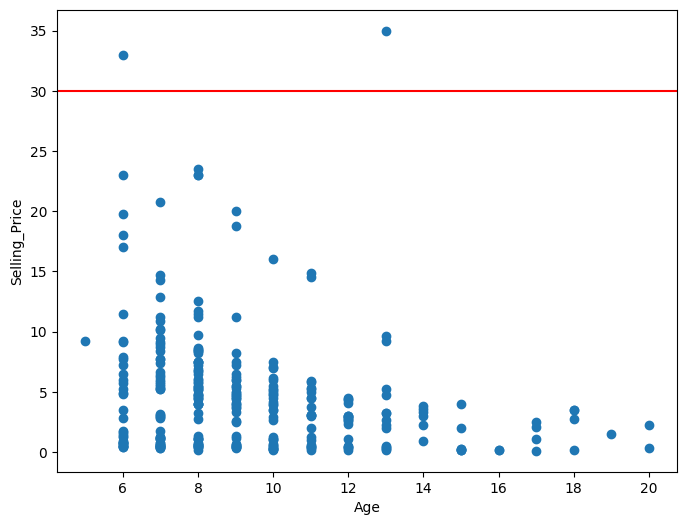

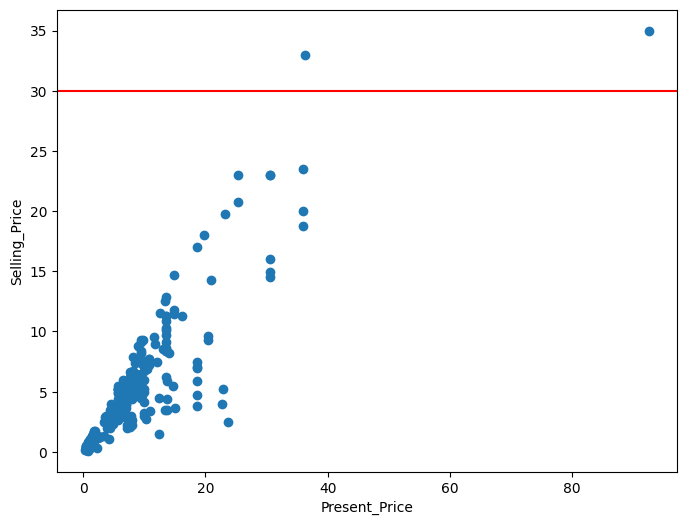

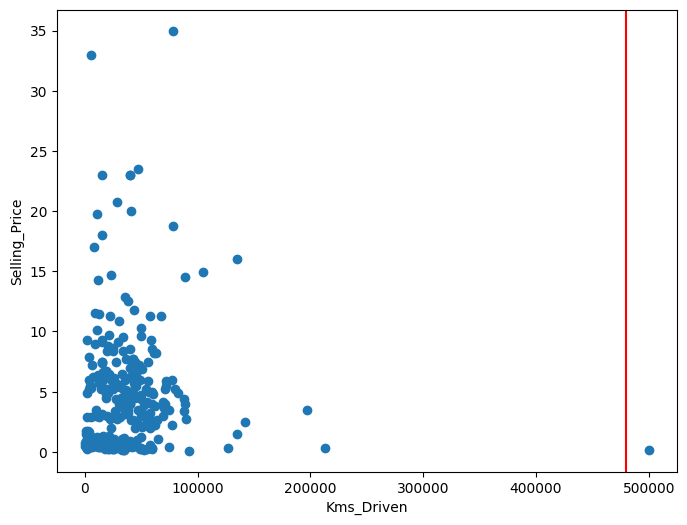

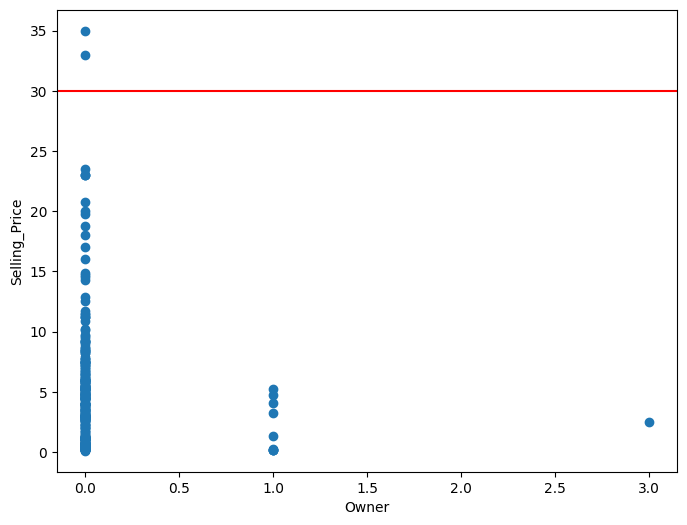

In [155]:
# Visualizing Data to show Outliers
fig=plt.figure(figsize=(20,15))
fs=mpl.gridspec.GridSpec(2,2)

create_scatter_plot(df,'Age','Selling_Price')
create_scatter_plot(df, 'Present_Price', 'Selling_Price')
create_scatter_plot(df, 'Kms_Driven', 'Selling_Price')
create_scatter_plot(df, 'Owner', 'Selling_Price')

##### Removing Outliers

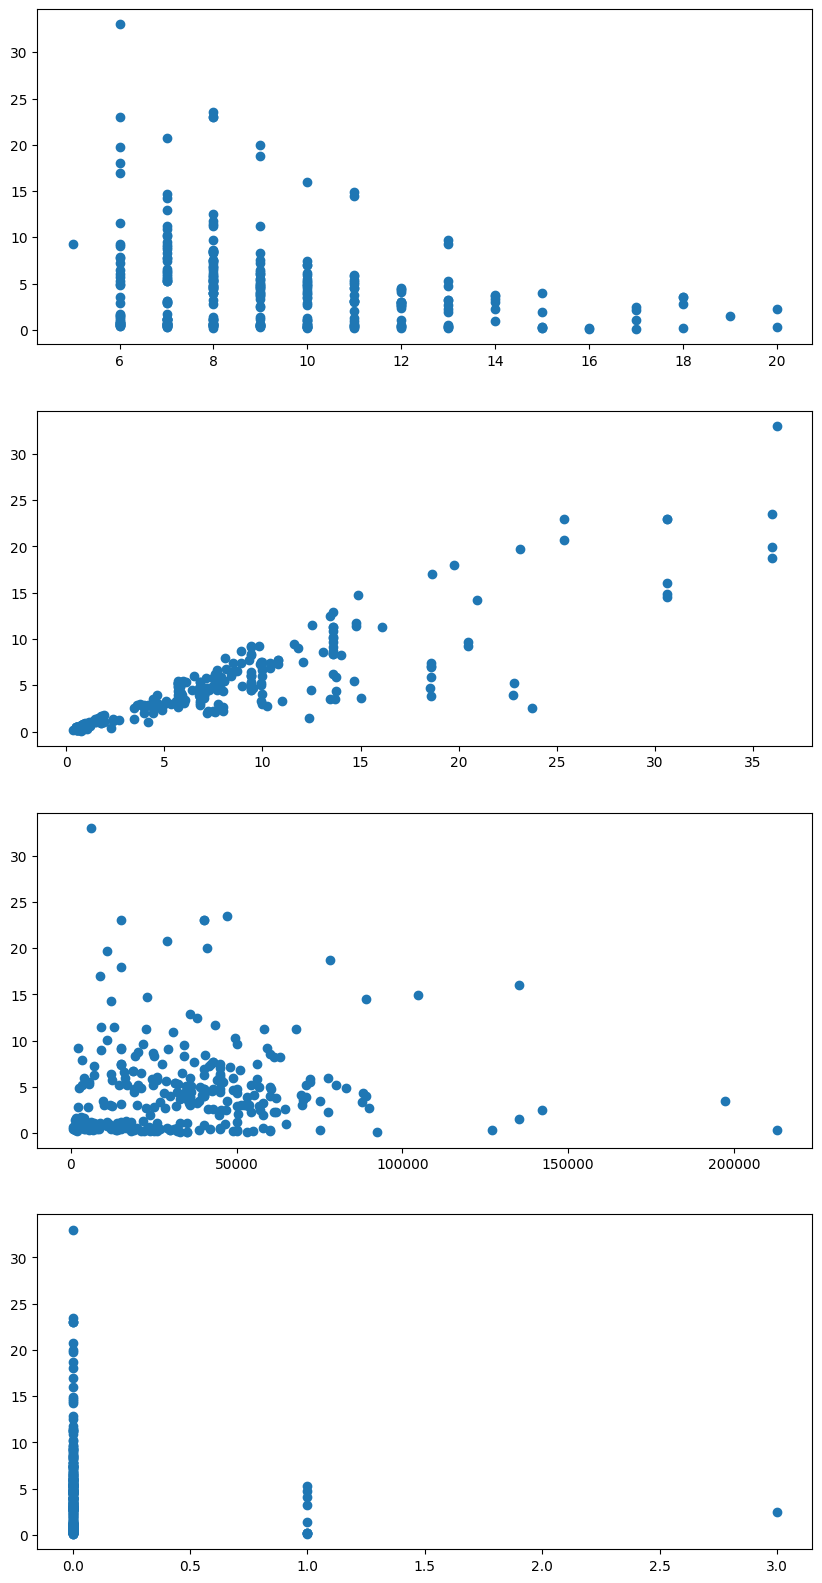

In [156]:
# The outliers are removed from the dataset
df.drop(index=[86,196],inplace=True)

# Plot without outliers
df_show=['Age','Present_Price','Kms_Driven','Owner']
fig , ax=plt.subplots(4,1,figsize=(10,20))

for index,item in enumerate(df_show):
    ax[index].scatter(df[item],df['Selling_Price'])

##### Converting categoriacal features to numerical features

In [157]:
# Filtering categorical features from the dataset
numericalDf =pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True);

# Reseting the index
numericalDf.reset_index(drop=True,inplace=True) 

numericalDf.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9,3.35,5.59,27000,0,False,True,False,True
1,10,4.75,9.54,43000,0,True,False,False,True
2,6,7.25,9.85,6900,0,False,True,False,True
3,12,2.85,4.15,5200,0,False,True,False,True
4,9,4.60,6.87,42450,0,True,False,False,True


##### Correlation Matrix

<Axes: >

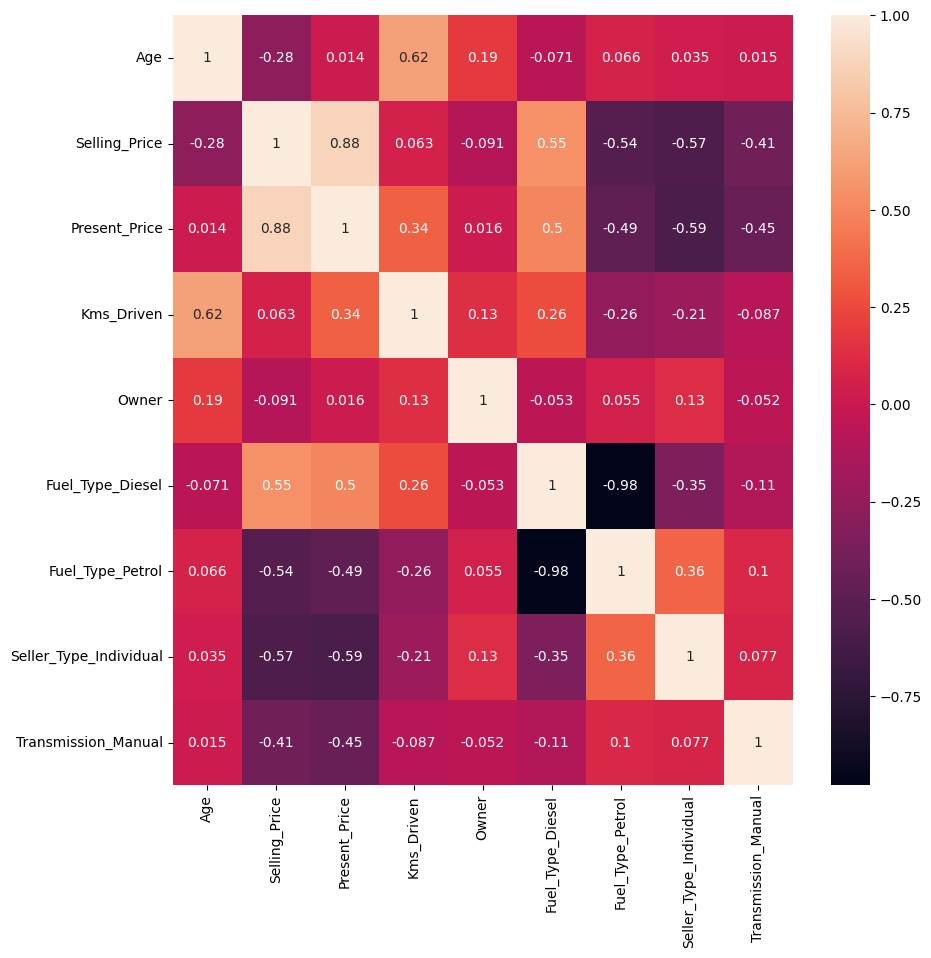

In [158]:
# Correlation Matrix
correlationMatrix = numericalDf.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlationMatrix, annot=True)

#### **3. Training the model**

##### Splitting the data into training and testing sets

In [163]:
X=df1.drop('Selling_Price',axis=1)
Y=df1['Selling_Price']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
model = LinearRegression()

model.fit(X_train,Y_train)

KeyError: "None of [Index([281, 117, 204, 228,  50, 158,  97, 147,  24,  80,\n       ...\n        68, 200, 202, 252, 247, 142, 250, 130, 108, 283],\n      dtype='int32', length=210)] are in the [columns]"

##### Predicting the price of a house using Linear Regression

LinearRegression() 

R-Square score : 0.9051936651990022
Cross-Validation scores: [0.88658928 0.88656036 0.849638   0.85327881 0.85370256]
Cross-Validation mean: 0.86595380174674


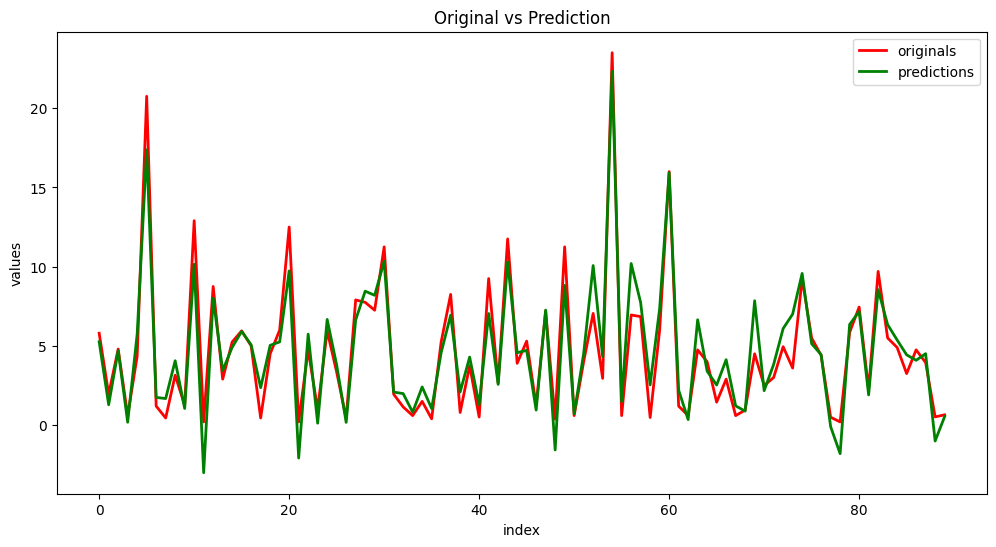

In [164]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

lr = LinearRegression()
model(lr,X_train,Y_train,X_test,Y_test)